In [1]:
# !conda upgrade -n base -c defaults --override-channels conda
# !echo "Y" | conda install pytorch torchvision -c pytorch
# !conda install pytorch torchvision --yes -c pytorch
# !conda install pytorch --yes -c pytorch
# !pip install pytorch

In [2]:
import torch
torch.__version__

'2.4.1+cu121'

In [3]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        



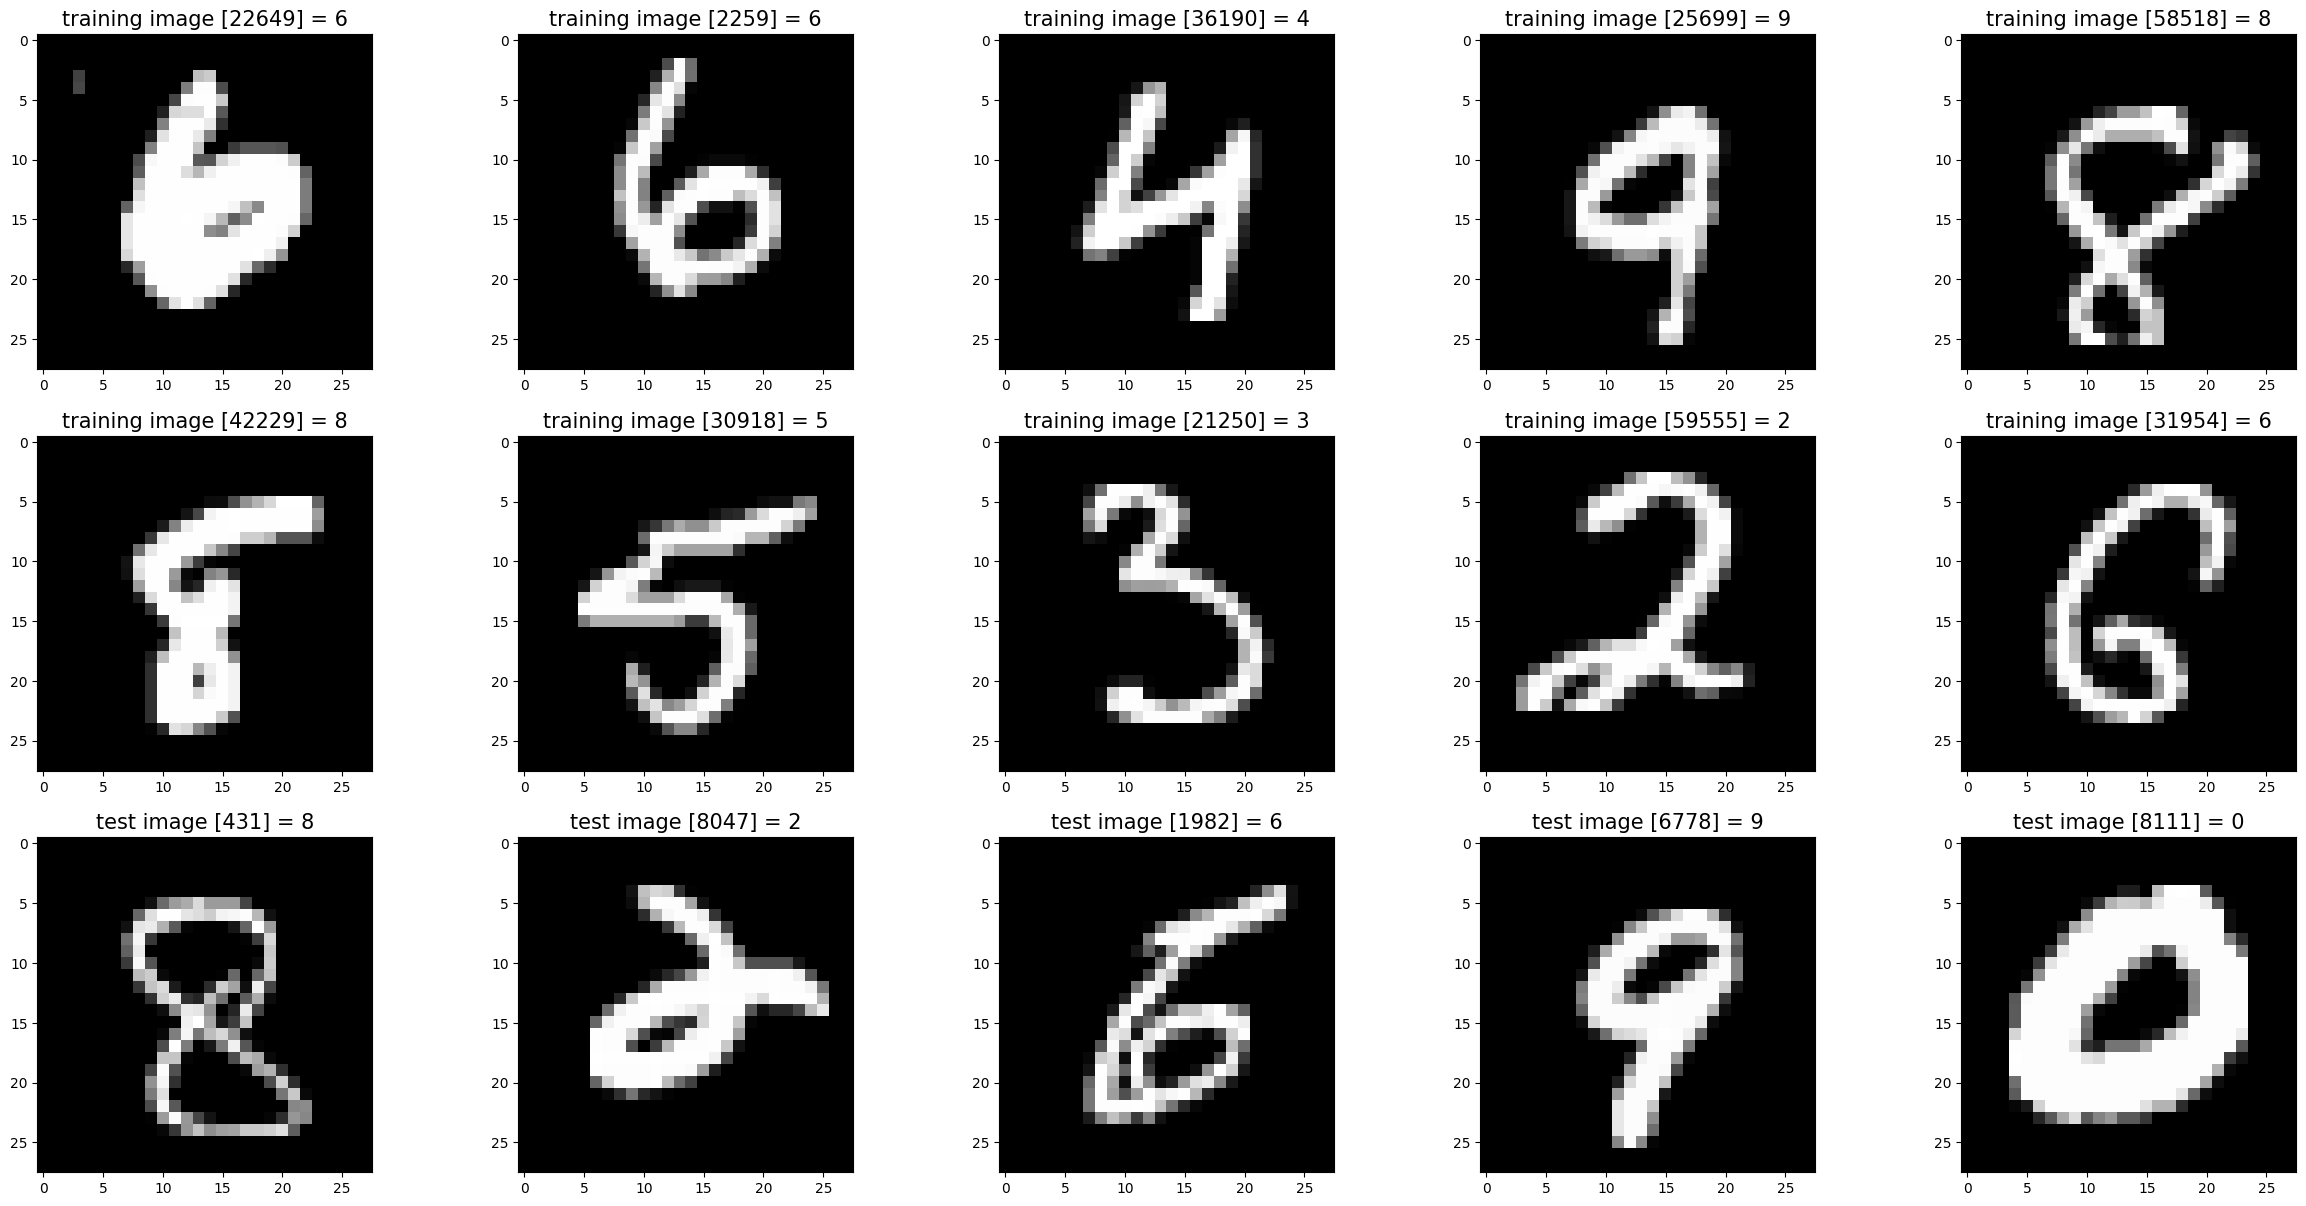

In [4]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

#
# Set file paths based on added MNIST Datasets
#
input_path = '../input'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [5]:
import torch
from torch import nn
import os
example_tensor = torch.tensor(x_train[0])
print(example_tensor)
print(y_train[0])
print(type(x_train[0]))
print(type(example_tensor))
print(example_tensor.shape)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

<ipython-input-5-0a4eb0416e76>:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  example_tensor = torch.tensor(x_train[0])


In [6]:
# mypy: allow-untyped-defs
from typing import Tuple, Union
from torch.nn import Module
from torch import Tensor
from torch.utils.data import DataLoader



__all__ = ["Flatten", "Unflatten"]



class Flatten(Module):
    r"""
    Flattens a contiguous range of dims into a tensor.

    For use with :class:`~nn.Sequential`, see :meth:`torch.flatten` for details.

    Shape:
        - Input: :math:`(*, S_{\text{start}},..., S_{i}, ..., S_{\text{end}}, *)`,'
          where :math:`S_{i}` is the size at dimension :math:`i` and :math:`*` means any
          number of dimensions including none.
        - Output: :math:`(*, \prod_{i=\text{start}}^{\text{end}} S_{i}, *)`.

    Args:
        start_dim: first dim to flatten (default = 1).
        end_dim: last dim to flatten (default = -1).

    Examples::
        >>> input = torch.randn(32, 1, 5, 5)
        >>> # With default parameters
        >>> m = nn.Flatten()
        >>> output = m(input)
        >>> output.size()
        torch.Size([32, 25])
        >>> # With non-default parameters
        >>> m = nn.Flatten(0, 2)
        >>> output = m(input)
        >>> output.size()
        torch.Size([160, 5])
    """

    __constants__ = ["start_dim", "end_dim"]
    start_dim: int
    end_dim: int

    def __init__(self, start_dim: int = 1, end_dim: int = -1) -> None:
        super().__init__()
        self.start_dim = start_dim
        self.end_dim = end_dim

    def forward(self, input: Tensor) -> Tensor:
        return input.flatten(self.start_dim, self.end_dim)

    def extra_repr(self) -> str:
        return f"start_dim={self.start_dim}, end_dim={self.end_dim}"




class Unflatten(Module):
    r"""
    Unflattens a tensor dim expanding it to a desired shape. For use with :class:`~nn.Sequential`.

    * :attr:`dim` specifies the dimension of the input tensor to be unflattened, and it can
      be either `int` or `str` when `Tensor` or `NamedTensor` is used, respectively.

    * :attr:`unflattened_size` is the new shape of the unflattened dimension of the tensor and it can be
      a `tuple` of ints or a `list` of ints or `torch.Size` for `Tensor` input;  a `NamedShape`
      (tuple of `(name, size)` tuples) for `NamedTensor` input.

    Shape:
        - Input: :math:`(*, S_{\text{dim}}, *)`, where :math:`S_{\text{dim}}` is the size at
          dimension :attr:`dim` and :math:`*` means any number of dimensions including none.
        - Output: :math:`(*, U_1, ..., U_n, *)`, where :math:`U` = :attr:`unflattened_size` and
          :math:`\prod_{i=1}^n U_i = S_{\text{dim}}`.

    Args:
        dim (Union[int, str]): Dimension to be unflattened
        unflattened_size (Union[torch.Size, Tuple, List, NamedShape]): New shape of the unflattened dimension

    Examples:
        >>> input = torch.randn(2, 50)
        >>> # With tuple of ints
        >>> m = nn.Sequential(
        >>>     nn.Linear(50, 50),
        >>>     nn.Unflatten(1, (2, 5, 5))
        >>> )
        >>> output = m(input)
        >>> output.size()
        torch.Size([2, 2, 5, 5])
        >>> # With torch.Size
        >>> m = nn.Sequential(
        >>>     nn.Linear(50, 50),
        >>>     nn.Unflatten(1, torch.Size([2, 5, 5]))
        >>> )
        >>> output = m(input)
        >>> output.size()
        torch.Size([2, 2, 5, 5])
        >>> # With namedshape (tuple of tuples)
        >>> input = torch.randn(2, 50, names=('N', 'features'))
        >>> unflatten = nn.Unflatten('features', (('C', 2), ('H', 5), ('W', 5)))
        >>> output = unflatten(input)
        >>> output.size()
        torch.Size([2, 2, 5, 5])
    """

    NamedShape = Tuple[Tuple[str, int]]

    __constants__ = ["dim", "unflattened_size"]
    dim: Union[int, str]
    unflattened_size: Union[NamedShape]

    def __init__(
        self, dim: Union[int, str], unflattened_size: Union[NamedShape]
    ) -> None:
        super().__init__()

        if isinstance(dim, int):
            self._require_tuple_int(unflattened_size)
        elif isinstance(dim, str):
            self._require_tuple_tuple(unflattened_size)
        else:
            raise TypeError("invalid argument type for dim parameter")

        self.dim = dim
        self.unflattened_size = unflattened_size

    def _require_tuple_tuple(self, input):
        if isinstance(input, tuple):
            for idx, elem in enumerate(input):
                if not isinstance(elem, tuple):
                    raise TypeError(
                        "unflattened_size must be tuple of tuples, "
                        + f"but found element of type {type(elem).__name__} at pos {idx}"
                    )
            return
        raise TypeError(
            "unflattened_size must be a tuple of tuples, "
            + f"but found type {type(input).__name__}"
        )

    def _require_tuple_int(self, input):
        if isinstance(input, (tuple, list)):
            for idx, elem in enumerate(input):
                if not isinstance(elem, int):
                    raise TypeError(
                        "unflattened_size must be tuple of ints, "
                        + f"but found element of type {type(elem).__name__} at pos {idx}"
                    )
            return
        raise TypeError(
            f"unflattened_size must be a tuple of ints, but found type {type(input).__name__}"
        )

    def forward(self, input: Tensor) -> Tensor:
        return input.unflatten(self.dim, self.unflattened_size)

    def extra_repr(self) -> str:
        return f"dim={self.dim}, unflattened_size={self.unflattened_size}"


In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 28*28),
            nn.ReLU(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = torch.Tensor(x)
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=784, bias=True)
    (1): ReLU()
    (2): Linear(in_features=784, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [9]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [10]:
x_train_tensor = [torch.Tensor(x) for x in x_train]
x_test_tensor = [torch.Tensor(x) for x in x_test]

In [11]:
training_data = list(zip(x_train_tensor, y_train))
test_data = list(zip(x_test_tensor, y_test))

In [12]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [14]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [15]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 10.046605  [   64/60000]
loss: 0.404802  [ 6464/60000]
loss: 0.285604  [12864/60000]
loss: 0.353890  [19264/60000]
loss: 0.202972  [25664/60000]
loss: 0.178890  [32064/60000]
loss: 0.135583  [38464/60000]
loss: 0.412388  [44864/60000]
loss: 0.241094  [51264/60000]
loss: 0.353827  [57664/60000]
Test Error: 
 Accuracy: 94.3%, Avg loss: 0.191465 

Epoch 2
-------------------------------
loss: 0.156509  [   64/60000]
loss: 0.154557  [ 6464/60000]
loss: 0.107468  [12864/60000]
loss: 0.120610  [19264/60000]
loss: 0.074887  [25664/60000]
loss: 0.097087  [32064/60000]
loss: 0.068988  [38464/60000]
loss: 0.285620  [44864/60000]
loss: 0.200924  [51264/60000]
loss: 0.229441  [57664/60000]
Test Error: 
 Accuracy: 95.8%, Avg loss: 0.147892 

Epoch 3
-------------------------------
loss: 0.098242  [   64/60000]
loss: 0.120535  [ 6464/60000]
loss: 0.073693  [12864/60000]
loss: 0.059714  [19264/60000]
loss: 0.040698  [25664/60000]
loss: 0.079632  [32064/60

In [16]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_se

In [17]:
for module in model.named_modules():
    print(module[1])

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=784, bias=True)
    (1): ReLU()
    (2): Linear(in_features=784, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)
Flatten(start_dim=1, end_dim=-1)
Sequential(
  (0): Linear(in_features=784, out_features=784, bias=True)
  (1): ReLU()
  (2): Linear(in_features=784, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=10, bias=True)
)
Linear(in_features=784, out_features=784, bias=True)
ReLU()
Linear(in_features=784, out_features=256, bias=True)
ReLU()
Linear(in_features=256, out_features=10, bias=True)


In [18]:
print(dir(model.linear_relu_stack[0]))

['T_destination', '__annotations__', '__call__', '__class__', '__constants__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_backward_pre_hooks', '_buffers', '_call_impl', '_compiled_call_impl', '_forward_hooks', '_forward_hooks_always_called', '_forward_hooks_with_kwargs', '_forward_pre_hooks', '_forward_pre_hooks_with_kwargs', '_get_backward_hooks', '_get_backward_pre_hooks', '_get_name', '_is_full_backward_hook', '_load_from_state_dict', '_load_state_dict_post_hooks', '_load_state_dict_pre_hooks', '_maybe_warn_non_full_backward_hook', '_modules', '_named_members', '_non_persistent_buffers_set', '_parameters', '_register_load_s

In [19]:
linear_layer_1 = model.linear_relu_stack[0]
relu_layer_1 = model.linear_relu_stack[1]
linear_layer_2 = model.linear_relu_stack[2]

In [20]:
print(linear_layer_1.weight)

Parameter containing:
tensor([[-0.0083, -0.0179,  0.0060,  ..., -0.0051,  0.0339,  0.0003],
        [-0.0068,  0.0129,  0.0025,  ..., -0.0019, -0.0046,  0.0009],
        [-0.0351,  0.0317, -0.0152,  ...,  0.0255, -0.0048,  0.0060],
        ...,
        [-0.0230, -0.0300, -0.0275,  ..., -0.0280, -0.0079, -0.0066],
        [-0.0256, -0.0301, -0.0336,  ...,  0.0280, -0.0305,  0.0047],
        [ 0.0186, -0.0258,  0.0234,  ..., -0.0338, -0.0023, -0.0004]],
       requires_grad=True)


tensor([[ 2740.4126,   632.3613,   284.4345,  ...,  3892.4854, -3651.1667,
         -2619.1426],
        [  632.3613,   145.9199,    65.6344,  ...,   898.2068,  -842.5215,
          -604.3777],
        [  284.4345,    65.6344,    29.5222,  ...,   404.0111,  -378.9641,
          -271.8476],
        ...,
        [ 3892.4854,   898.2068,   404.0111,  ...,  5528.8911, -5186.1216,
         -3720.2334],
        [-3651.1667,  -842.5215,  -378.9641,  ..., -5186.1216,  4864.6025,
          3489.5935],
        [-2619.1426,  -604.3777,  -271.8476,  ..., -3720.2334,  3489.5935,
          2503.2390]], grad_fn=<MmBackward0>)
torch.Size([784])
tensor(3016.2222, grad_fn=<SqueezeBackward0>)
tensor(1., grad_fn=<DivBackward0>)
-36140.547


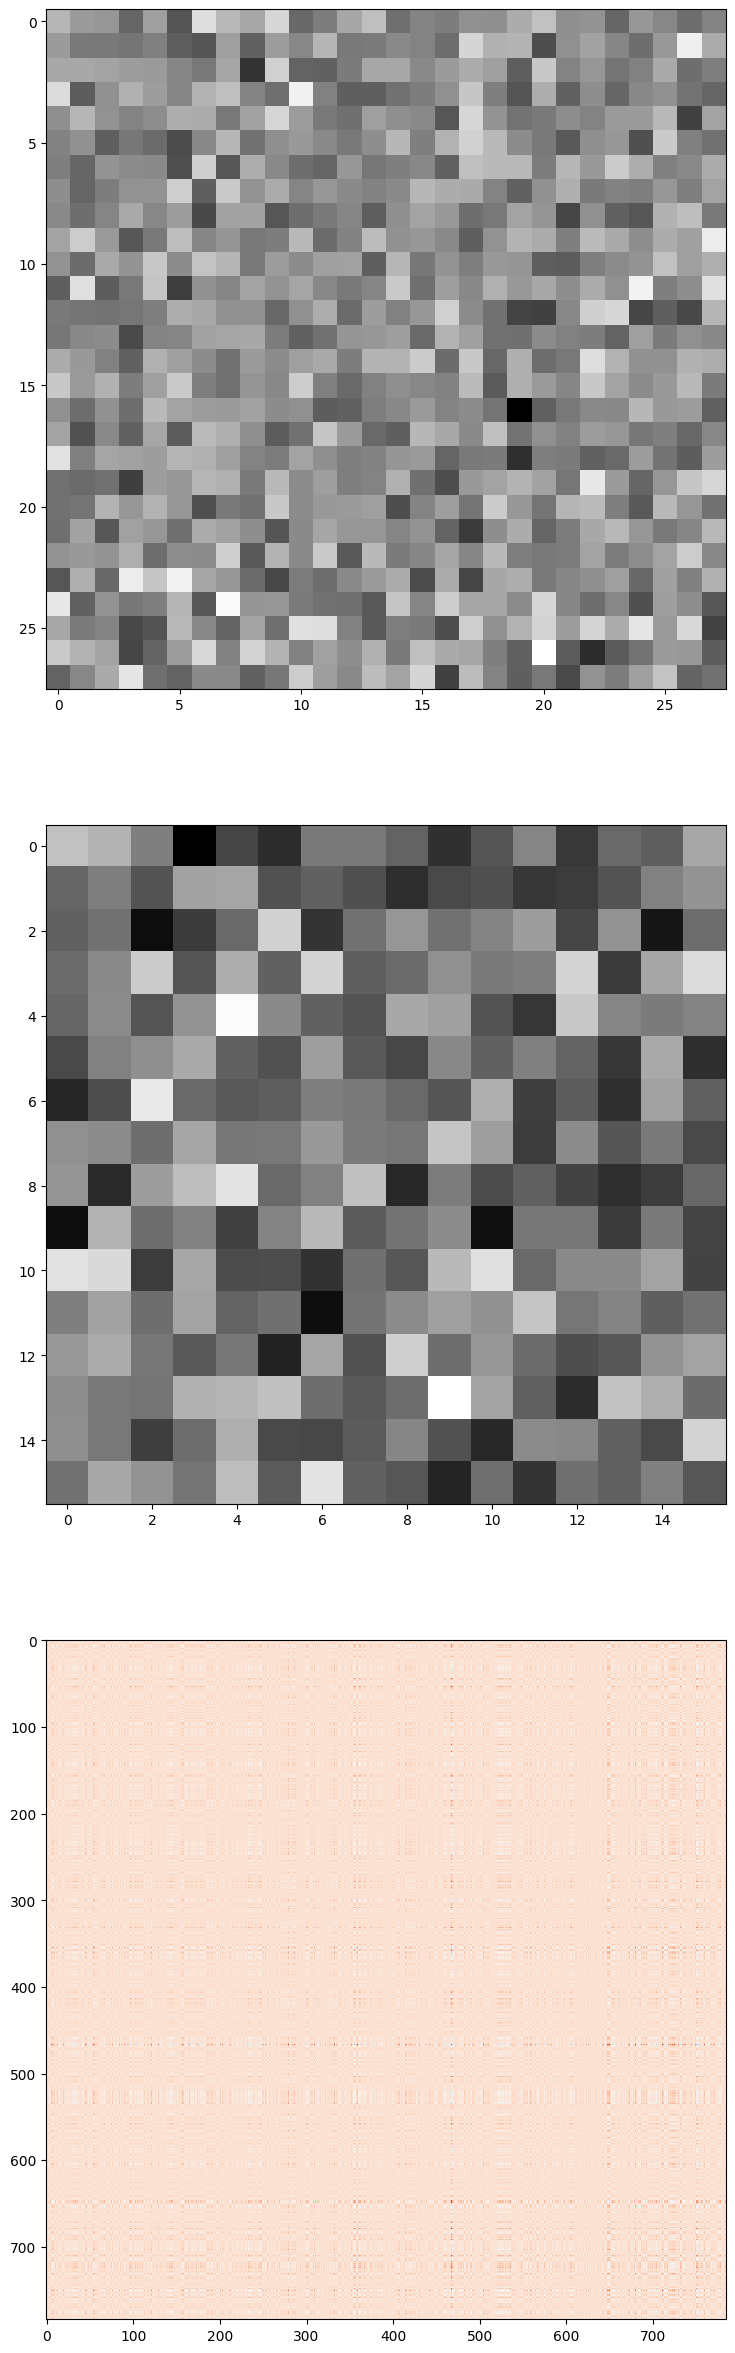

In [21]:
flat_x_train_tensor_1 = torch.flatten(x_train_tensor[1])
linear_layer_1_out = linear_layer_1(flat_x_train_tensor_1)
relu_layer_1_out = relu_layer_1(linear_layer_1_out)
linear_layer_2_out = linear_layer_2(relu_layer_1_out)
linear_layer_2_out_image = linear_layer_2_out.reshape((16, -1)).detach().numpy()
# print(linear_layer_1_out.shape)
# print(linear_layer_1_out.reshape((28, -1)))
linear_layer_1_out_image = linear_layer_1_out.reshape((28, -1)).detach().numpy()
linear_layer_1_out_cross_matrix = (linear_layer_1_out.reshape((-1, 1)) @ linear_layer_1_out.reshape((1, -1))).detach().numpy()
plt.figure(figsize=(10,30))
plt.subplot(3, 1, 1)  
plt.imshow(linear_layer_1_out_image, cmap=plt.cm.gray)
plt.subplot(3, 1, 2)  
plt.imshow(linear_layer_2_out_image, cmap=plt.cm.gray)
plt.subplot(3, 1, 3)
plt.imshow(linear_layer_1_out_cross_matrix, cmap=plt.cm.RdBu, norm = mpl.colors.Normalize(vmin=linear_layer_1_out_cross_matrix.min(), vmax=linear_layer_1_out_cross_matrix.max()))

print(linear_layer_1_out.reshape((-1, 1)) @ linear_layer_1_out.reshape((1, -1)))
print(linear_layer_1_out.shape)
print(torch.cov(linear_layer_1_out))
print(torch.corrcoef(linear_layer_1_out))
print(linear_layer_1_out_cross_matrix.min())

In [22]:
x = torch.tensor([[0, 1, 2], [2, 1, 0]])
torch.corrcoef(x)
x = torch.randn(2, 4)
x
torch.corrcoef(x)
torch.corrcoef(x[0])

tensor(1.)

In [23]:
print(torch.__version__)

2.4.1+cu121


7
[False False False ... False  True False]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  69 152
  237 254 254 255 254 252  52   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  87 164 237 253 254
  218 138  83  39 154 254 135   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 138 246 253 254 216 167  54
    5   0   0   0 100 191   3   0   0   0]
 [  0   0   0   0   

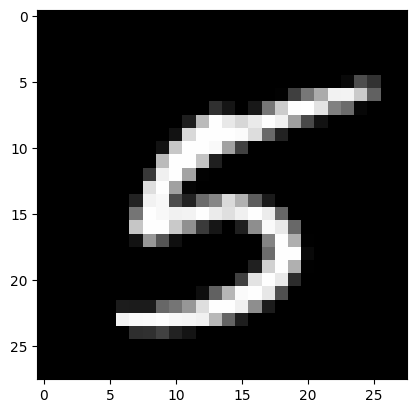

In [24]:
print(y_test[0])

type(y_test[0])
fives_idx = np.array(np.array(y_test) == 5)
print(fives_idx)
fives = np.array(x_test)[fives_idx]

print(fives[2])
plt.imshow(fives[4], cmap=plt.cm.gray)

zeros_idx = np.array(np.array(y_test) == 0)
zeros = np.array(x_test)[zeros_idx]
print(len(zeros), len(fives))

In [25]:
print(model.linear_relu_stack[:-1])
model.linear_relu_stack[:-1](flat_x_train_tensor_1)

Sequential(
  (0): Linear(in_features=784, out_features=784, bias=True)
  (1): ReLU()
  (2): Linear(in_features=784, out_features=256, bias=True)
  (3): ReLU()
)


tensor([17.7682, 12.0489,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  6.3321,
         0.0000,  0.0000,  0.0000,  4.2844,  5.7672,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 24.5290,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  1.9278,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000, 22.0640,  0.0000,  9.0780,  0.0000, 25.3759,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000, 25.7299,  0.0000,  5.4819, 28.8384,
         0.0000,  0.0000,  0.0000,  0.0000, 42.7109,  0.0000,  0.0000,  0.0000,
         6.7985,  3.5368,  0.0000,  0.0000, 20.6845,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  7.6200,  0.0000,  0.0000,  2.4434,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  7.3334,  0.0000,
         0.0000,  0.0000, 34.9554,  0.00

In [26]:
layer_2_out_pre_activation = model.linear_relu_stack[:-2]
print(layer_2_out_pre_activation)
norm = len(zeros)
avg_out_zeros = torch.zeros(model.linear_relu_stack[-3].weight.shape[0])
for tensor_ in zeros:
    flattened_input = torch.flatten(torch.tensor(tensor_, dtype=torch.float))

    avg_out_zeros += layer_2_out_pre_activation(flattened_input)
avg_out_zeros /= norm
print(avg_out_zeros)

avg_out_fives = torch.zeros(model.linear_relu_stack[-3].weight.shape[0])
for tensor_ in fives:
    flattened_input = torch.flatten(torch.tensor(tensor_, dtype=torch.float))

    avg_out_fives += layer_2_out_pre_activation(flattened_input)
avg_out_fives /= norm


Sequential(
  (0): Linear(in_features=784, out_features=784, bias=True)
  (1): ReLU()
  (2): Linear(in_features=784, out_features=256, bias=True)
)
tensor([ 17.6812,  17.4269, -21.5286, -40.8646, -31.6353, -27.1705,  -7.3799,
         -0.5253, -19.5758, -43.1740, -29.6596,  -3.1874, -40.8916, -12.0296,
        -15.3790,  -3.7314, -17.9921,  -9.1770, -26.5791,  -9.1999,   6.4010,
        -42.0043, -17.4127, -33.5865, -36.4744, -31.1752, -28.4011, -41.4098,
        -42.0954, -21.6388, -12.7005,  -8.9402, -23.4137, -30.0906, -46.9743,
        -42.9370, -13.5680,   4.9613, -39.4127,  -1.4873,   1.4798, -25.7449,
        -23.9228,  -4.0610, -36.7946, -14.2416, -30.6029, -19.8345, -16.8235,
         -4.7901,  37.3208, -20.3766,  -3.3449, -18.1880,  16.5754, -13.2293,
        -28.7178,  -1.8775,  -6.7503, -23.9200,  24.7997, -30.2831, -10.3773,
         14.8446,  -8.2011, -14.8306, -29.8456, -11.4370,  19.3620, -15.2096,
        -18.4730, -30.9137,  -6.0535,   4.5704, -27.2455, -38.9616,  18.

In [27]:
layer_2_out_pre_activation = model.linear_relu_stack[:-2]
print(layer_2_out_pre_activation)
norm = len(zeros)**2
print(norm)
shape = (model.linear_relu_stack[-3].weight.shape[0], model.linear_relu_stack[-3].weight.shape[0])
cov_out_zeros = torch.zeros(shape)
for tensor_ in zeros:
    flattened_input = torch.flatten(torch.tensor(tensor_, dtype=torch.float))
    cov_input = (layer_2_out_pre_activation(flattened_input) - avg_out_zeros).reshape((-1, 1)) @ (layer_2_out_pre_activation(flattened_input) - avg_out_zeros).reshape((1, -1))
    cov_out_zeros += cov_input
cov_out_zeros /= norm
print(cov_out_zeros)

cov_out_fives = torch.zeros(shape)
for tensor_ in fives:
    flattened_input = torch.flatten(torch.tensor(tensor_, dtype=torch.float))
    cov_input = (layer_2_out_pre_activation(flattened_input) - avg_out_fives).reshape((-1, 1)) @ (layer_2_out_pre_activation(flattened_input) - avg_out_fives).reshape((1, -1))
    cov_out_fives += cov_input
cov_out_fives /= norm
print(cov_out_fives)


flattened_input = torch.flatten(torch.tensor(fives[0], dtype=torch.float))
test_out = (layer_2_out_pre_activation(flattened_input) - avg_out_fives).reshape((-1, 1)) @ (layer_2_out_pre_activation(flattened_input) - avg_out_fives).reshape((1, -1))

Sequential(
  (0): Linear(in_features=784, out_features=784, bias=True)
  (1): ReLU()
  (2): Linear(in_features=784, out_features=256, bias=True)
)
960400
tensor([[ 0.2224, -0.0215, -0.0470,  ..., -0.0079, -0.0773,  0.0163],
        [-0.0215,  0.1479, -0.0207,  ..., -0.0546, -0.0015, -0.0434],
        [-0.0470, -0.0207,  0.1546,  ...,  0.0326,  0.0202,  0.0130],
        ...,
        [-0.0079, -0.0546,  0.0326,  ...,  0.2139,  0.0117,  0.0865],
        [-0.0773, -0.0015,  0.0202,  ...,  0.0117,  0.1615, -0.0148],
        [ 0.0163, -0.0434,  0.0130,  ...,  0.0865, -0.0148,  0.1940]],
       grad_fn=<DivBackward0>)
tensor([[ 0.2081,  0.0532, -0.0459,  ..., -0.0387, -0.0098, -0.0348],
        [ 0.0532,  0.2289, -0.0966,  ..., -0.0756,  0.0345, -0.0379],
        [-0.0459, -0.0966,  0.1431,  ...,  0.0185,  0.0262,  0.0256],
        ...,
        [-0.0387, -0.0756,  0.0185,  ...,  0.1366, -0.0377,  0.0468],
        [-0.0098,  0.0345,  0.0262,  ..., -0.0377,  0.2313, -0.0083],
        [-0.0348,

In [28]:
model.linear_relu_stack[-3].weight.shape[0]

256

In [29]:
layer_2_weights = model.linear_relu_stack[-3].weight
M = layer_2_weights @ layer_2_weights.T
print(M)

tensor([[ 0.3322,  0.0046,  0.0169,  ..., -0.0047,  0.0118,  0.0030],
        [ 0.0046,  0.3447, -0.0093,  ..., -0.0214, -0.0120,  0.0037],
        [ 0.0169, -0.0093,  0.3173,  ..., -0.0036, -0.0133,  0.0257],
        ...,
        [-0.0047, -0.0214, -0.0036,  ...,  0.3310,  0.0062,  0.0039],
        [ 0.0118, -0.0120, -0.0133,  ...,  0.0062,  0.3239, -0.0148],
        [ 0.0030,  0.0037,  0.0257,  ...,  0.0039, -0.0148,  0.3374]],
       grad_fn=<MmBackward0>)


(256, 256)


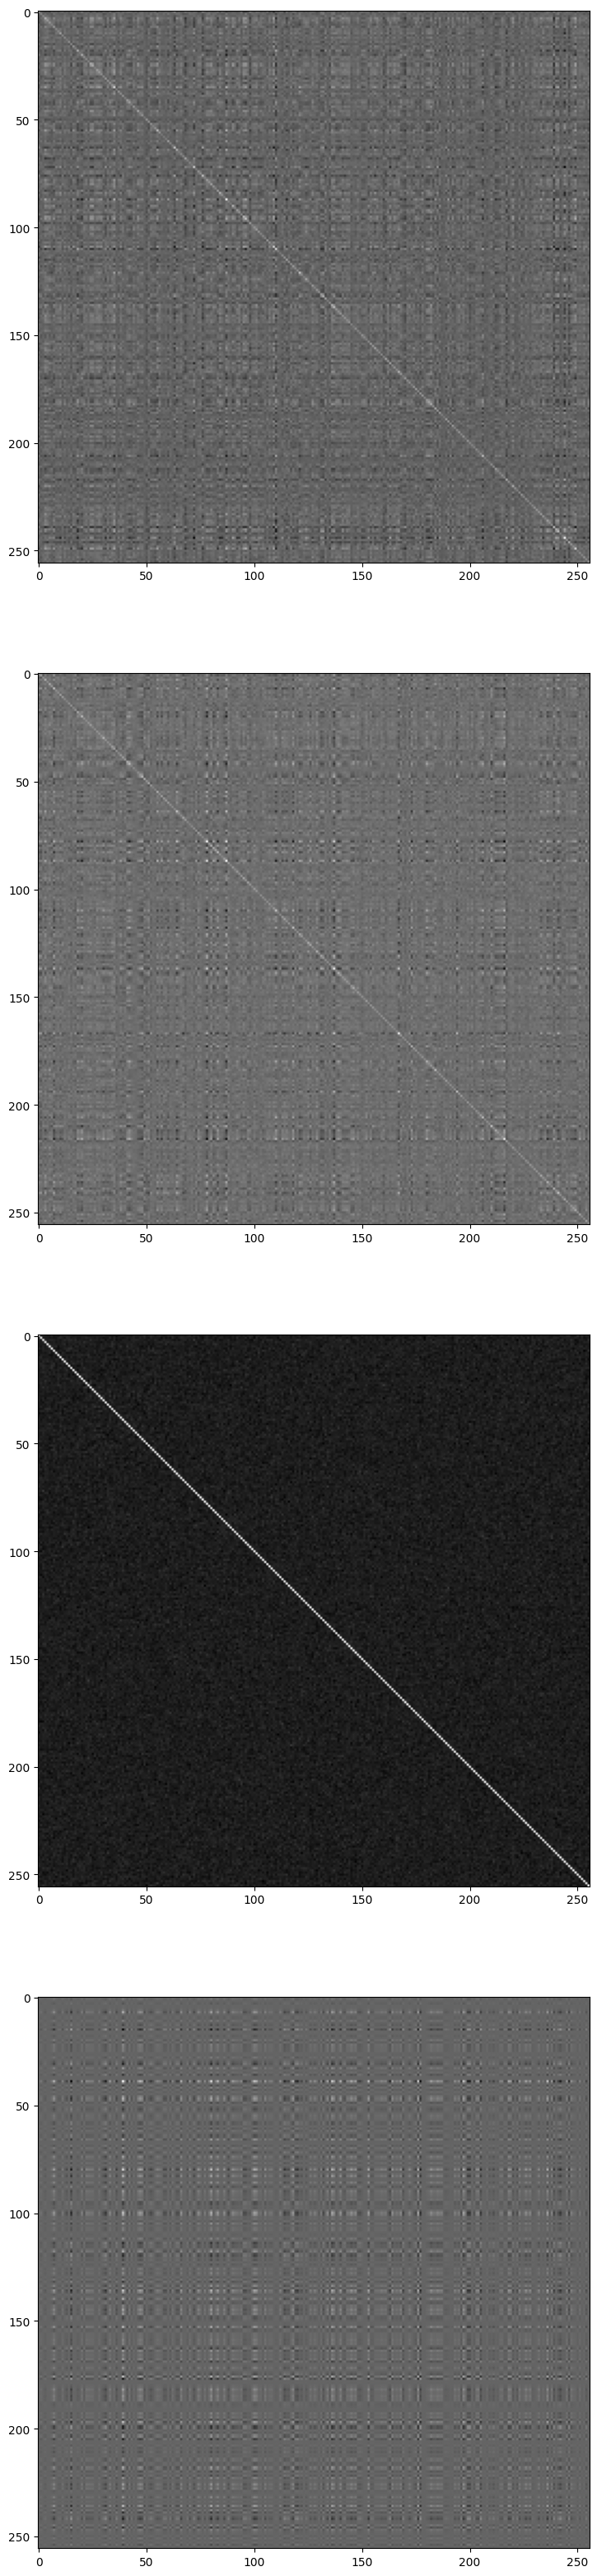

In [30]:
out = avg_out_zeros
out_mat = out.reshape((-1, 1)) @ out.reshape((1, -1))
cov_in = torch.stack((out, out))

covariance = torch.cov(cov_in.T, correction=0).detach().numpy()
print(covariance.shape)
covariance_ = (out.reshape((-1, 1)) @ out.reshape((1, -1))).detach().numpy()
plt.figure(figsize=(10,40))
plt.subplot(4, 1, 1)  
plt.imshow(cov_out_zeros.detach().numpy(), cmap=plt.cm.gray)
plt.subplot(4, 1, 2)  
plt.imshow(cov_out_fives.detach().numpy(), cmap=plt.cm.gray)
plt.subplot(4, 1, 3)  
plt.imshow(M.detach().numpy(), cmap=plt.cm.gray)
plt.subplot(4, 1, 4)
plt.imshow(test_out.detach().numpy(), cmap=plt.cm.gray)